In [1]:
import os

train_dir = r"C:\Users\SriMedha\OneDrive\Documents\UCB\sem4\NN_DL\FinalProject\archive (1)\New_Augmented_Anemia_Dataset\Conjuctiva\Training"
valid_dir = r"C:\Users\SriMedha\OneDrive\Documents\UCB\sem4\NN_DL\FinalProject\archive (1)\New_Augmented_Anemia_Dataset\Conjuctiva\Validation"
test_dir = r"C:\Users\SriMedha\OneDrive\Documents\UCB\sem4\NN_DL\FinalProject\archive (1)\New_Augmented_Anemia_Dataset\Conjuctiva\Testing"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and testing, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 8256 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(64, 64, 3))
x = layers.Conv2D(32, (2,2), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (2,2), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(128, (2,2), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(100, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       32896 

In [4]:
import tensorflow as tf

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50
)

Epoch 1/50
258/258 [==============================] - 251s 956ms/step - loss: 0.6907 - accuracy: 0.5275 - val_loss: 0.6933 - val_accuracy: 0.5400
Epoch 2/50
258/258 [==============================] - 274s 1s/step - loss: 0.6851 - accuracy: 0.5652 - val_loss: 0.6813 - val_accuracy: 0.5840
Epoch 3/50
258/258 [==============================] - 254s 984ms/step - loss: 0.6798 - accuracy: 0.5696 - val_loss: 0.6760 - val_accuracy: 0.6130
Epoch 4/50
258/258 [==============================] - 232s 898ms/step - loss: 0.6656 - accuracy: 0.6020 - val_loss: 0.6697 - val_accuracy: 0.5870
Epoch 5/50
258/258 [==============================] - 194s 753ms/step - loss: 0.6533 - accuracy: 0.6078 - val_loss: 0.6382 - val_accuracy: 0.6490
Epoch 6/50
258/258 [==============================] - 109s 420ms/step - loss: 0.6361 - accuracy: 0.6284 - val_loss: 0.6772 - val_accuracy: 0.5660
Epoch 7/50
258/258 [==============================] - 105s 406ms/step - loss: 0.6333 - accuracy: 0.6222 - val_loss: 0.6389 - va

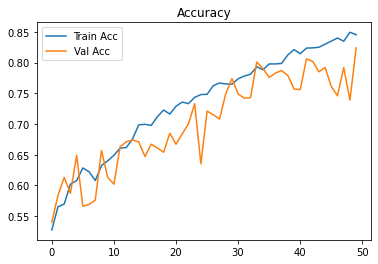

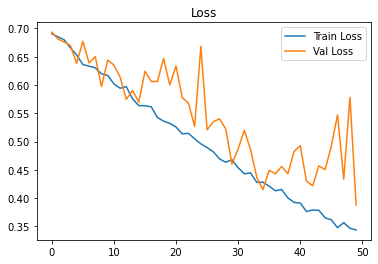

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

history_df = pd.DataFrame(history.history)

# Accuracy
plt.plot(history_df['accuracy'], label='Train Acc')
plt.plot(history_df['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [6]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

32/32 [==============================] - 12s 374ms/step - loss: 0.3844 - accuracy: 0.8290
Test Accuracy: 0.8290, Test Loss: 0.3844


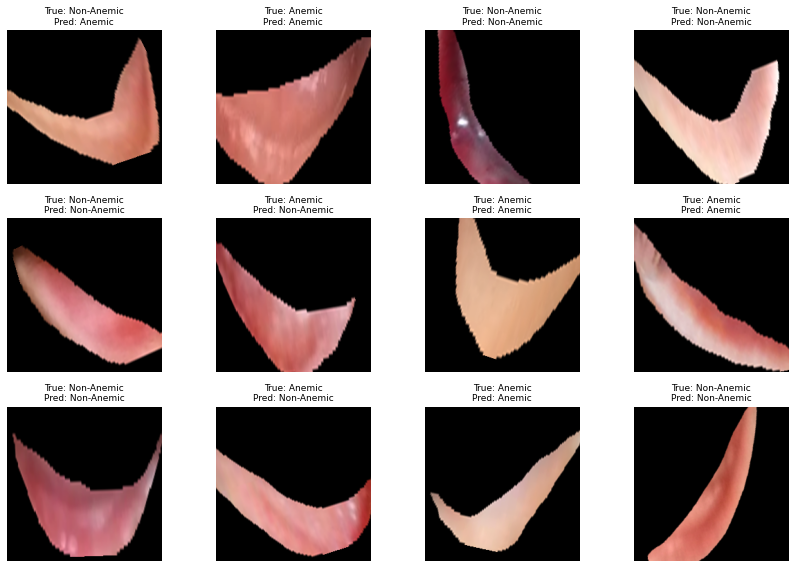

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = list(train_generator.class_indices.keys())

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img) / 255.0
    return np.expand_dims(img, axis=0)

def predict_and_visualize(image_paths):
    plt.figure(figsize=(12, 8))
    for i, path in enumerate(image_paths[:12]):
        img = preprocess_image(path[0])
        pred = model.predict(img, verbose=0)
        pred_class = class_labels[int(pred.round())]
        actual_class = path[1]

        plt.subplot(3, 4, i+1)
        plt.imshow(image.load_img(path[0]))
        plt.title(f"True: {actual_class}\nPred: {pred_class}", fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Build test image list
test_images = []
for label in os.listdir(test_dir):
    full_path = os.path.join(test_dir, label)
    for fname in os.listdir(full_path):
        test_images.append((os.path.join(full_path, fname), label))

import random
random.shuffle(test_images)
predict_and_visualize(test_images)

In [8]:
model.save("cnn_anemia_model.h5")

### Transfer Learning with MobileNetV2

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

### Image Preprocessing with MobileNetV2-Specific Settings

In [10]:
IMG_SIZE = (224, 224)  # MobileNetV2 expects 224x224

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 8256 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


###  Build the Transfer Learning Model

In [11]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(100, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs, output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               128100    
                                                                 
 dense_3 (Dense)             (None, 1)                 101 

### Train the Model

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
258/258 [==============================] - 695s 3s/step - loss: 0.7132 - accuracy: 0.5589 - val_loss: 0.6510 - val_accuracy: 0.6100
Epoch 2/30
258/258 [==============================] - 668s 3s/step - loss: 0.6737 - accuracy: 0.5921 - val_loss: 0.6286 - val_accuracy: 0.6540
Epoch 3/30
258/258 [==============================] - 665s 3s/step - loss: 0.6557 - accuracy: 0.6128 - val_loss: 0.6095 - val_accuracy: 0.6780
Epoch 4/30
258/258 [==============================] - 661s 3s/step - loss: 0.6416 - accuracy: 0.6371 - val_loss: 0.5957 - val_accuracy: 0.6990
Epoch 5/30
258/258 [==============================] - 748s 3s/step - loss: 0.6361 - accuracy: 0.6420 - val_loss: 0.5861 - val_accuracy: 0.6960
Epoch 6/30
258/258 [==============================] - 817s 3s/step - loss: 0.6299 - accuracy: 0.6480 - val_loss: 0.5816 - val_accuracy: 0.6860
Epoch 7/30
258/258 [==============================] - 773s 3s/step - loss: 0.6173 - accuracy: 0.6609 - val_loss: 0.5628 - val_accuracy: 0.7190

### Visualize Training

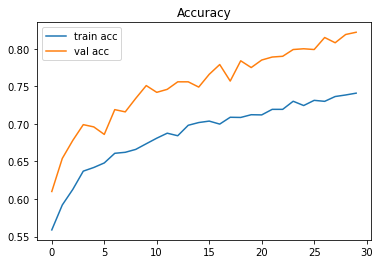

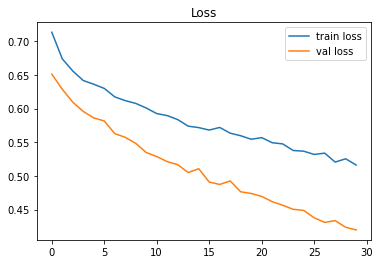

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

32/32 [==============================] - 50s 2s/step - loss: 0.4393 - accuracy: 0.8080
Test Accuracy: 0.8080, Test Loss: 0.4393


In [15]:
model.save("mobilenetv2_anemia_model.h5")

### Unfreezing and Fine-Tuning

In [16]:
base_model.trainable = True
model.compile(optimizer=Adam(1e-5),  # Lower LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune for a few more epochs---------------------------
fine_tune_history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
258/258 [==============================] - 1630s 6s/step - loss: 0.5001 - accuracy: 0.7539 - val_loss: 0.3840 - val_accuracy: 0.8380
Epoch 2/10
258/258 [==============================] - 1974s 8s/step - loss: 0.4511 - accuracy: 0.7837 - val_loss: 0.3311 - val_accuracy: 0.8610
Epoch 3/10
258/258 [==============================] - 1791s 7s/step - loss: 0.4067 - accuracy: 0.8126 - val_loss: 0.2829 - val_accuracy: 0.8830
Epoch 4/10
258/258 [==============================] - 1059s 4s/step - loss: 0.3624 - accuracy: 0.8404 - val_loss: 0.2582 - val_accuracy: 0.8970
Epoch 5/10
258/258 [==============================] - 1626s 6s/step - loss: 0.3253 - accuracy: 0.8595 - val_loss: 0.2485 - val_accuracy: 0.9030
Epoch 6/10
258/258 [==============================] - 2089s 8s/step - loss: 0.2851 - accuracy: 0.8802 - val_loss: 0.1898 - val_accuracy: 0.9230
Epoch 7/10
258/258 [==============================] - 2216s 9s/step - loss: 0.2565 - accuracy: 0.8958 - val_loss: 0.1421 - val_accuracy:

In [17]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy after Fine-tuning: {accuracy:.4f}, Test Loss: {loss:.4f}")

32/32 [==============================] - 59s 2s/step - loss: 0.1015 - accuracy: 0.9640
Test Accuracy after Fine-tuning: 0.9640, Test Loss: 0.1015


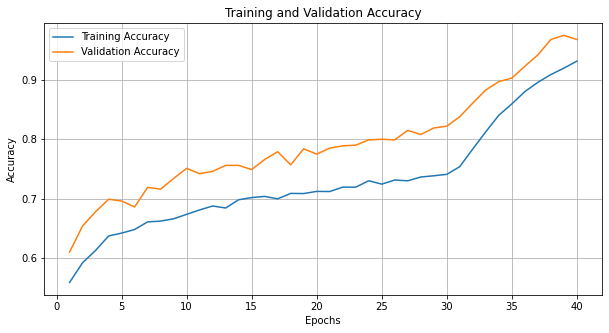

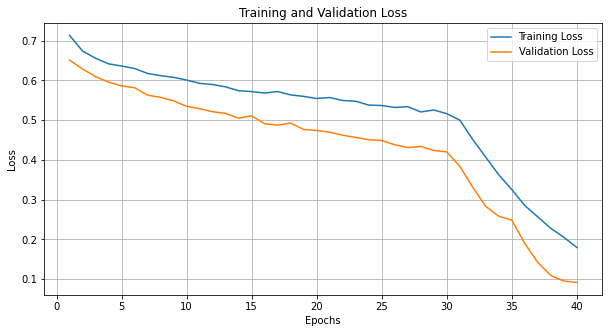

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + fine_tune_history.history['accuracy']
val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy']
loss = history.history['loss'] + fine_tune_history.history['loss']
val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
y_pred_prob = model.predict(test_generator, verbose=1)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
y_true = test_generator.classes

32/32 [==============================] - 67s 2s/step


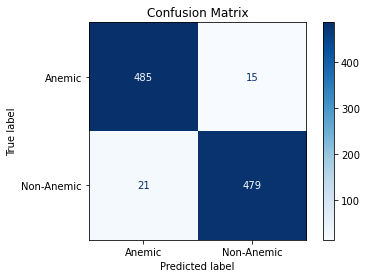

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [22]:
from sklearn.metrics import classification_report

# Printing classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

      Anemic       0.96      0.97      0.96       500
  Non-Anemic       0.97      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



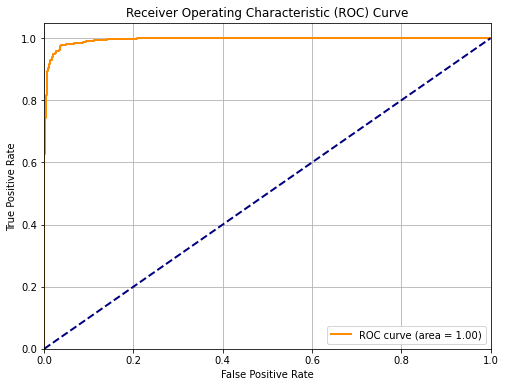

In [21]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()